<img width=800 height=800 class="imgright" src="Images/SupportVektorMachines.png">
Wir wollen uns jetzt mit einem anderen Algorithmus beschäftigen, einem Support Vector Algorithmus oder Stützvektoralgorithmus, der zur Klassifizierung und auch für die Regression verwendet werden kann, aber auf einem anderen Mechanismus der Findung von Entscheidungsgrenzen beruht. Wir zeigen die Wirkungsweise dieses Algorithmus für die Klassifikation hier in 2 Dimensionen. Dies kann aber sowohl bezüglich der Anzahl der Features als auch der Anzahl der verschiedenen Klassen ausgedehnt werden. Die optimale Trennfläche zwischen den Klassen wird auch als Hyperfläche bezeichnet. Wir werden den Algorithmus und seine Besonderheiten mit einem Perzeptron als Klassifikator vergleichen. Wir werden aber jetzt hierfür die in sklearn eingebaute Methode linear_model.Perceptron verwenden, die genau dasselbe leistet wie unser selbstgeschriebenes Perceptronprogramm.

Mit der make_blobs Methode erzeugen wir zunächst zwei Punktwolken mit jeweils 50 Punkten, die in zwei Kategorien aufgeteilt sind und linear separierbar sind. In der unteren Grafik ist die Trennfläche mit den Punkten dargestellt. Diese wurde im Perceptron wie schon gezeigt durch Minimierung der logarithmischen Verlustfunktion und das Gradientenabstiegsverfahren erzeugt. Die Daten werden zu jeweils 50% als Trainings- und Testdaten aufgeteilt. Die Accuracy des Verfahrens beträgt 94% für die Testdaten.

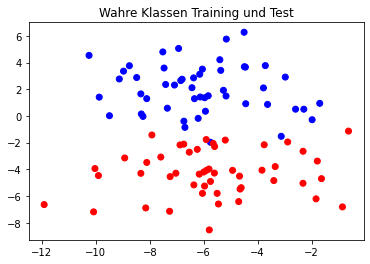

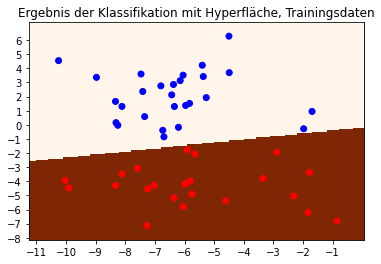

Accuracy Test 0.94
Steigung: 0.21
Schnittpunkt Y-Achse: -0.28


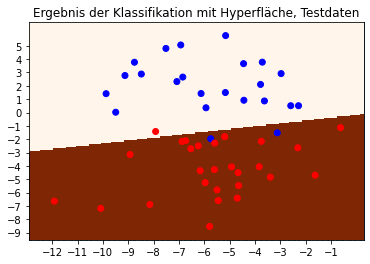

In [1]:
from sklearn.datasets import make_blobs
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np


def visualize_classifier(classifier,X,y,lab_x="",lab_y=""):
    
    
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    # Mache das Meshgrid mit dieser Stepgröße
    mesh_step_size = .1
    
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    plt.scatter(x_vals,y_vals,s=1)
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    output = output.reshape(x_vals.shape)
    plt.pcolormesh(x_vals, y_vals, output, cmap="Oranges",shading='auto') 

    
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max()) 
 
    # Mache die x uin y Ticks 
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0))) 
    plt.xlabel(lab_x,fontsize=14)
    plt.ylabel(lab_y,fontsize=14)
    return

##########################main#############################

X,y=make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0,\
                                center_box=(- 8, 8), shuffle=True, random_state=43, return_centers=False) 
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.5, random_state=43)

#zeige Ausgangsdaten
colormap=np.array(["b","r"])
plt.title("Wahre Klassen Training und Test")
plt.scatter(X[:,0],X[:,1],color=colormap[y])
plt.show()

#nutze Perceptron
cat=linear_model.Perceptron(tol=1e-3, random_state=0)
cat.fit(X_train,y_train)

plt.title("Ergebnis der Klassifikation mit Hyperfläche, Trainingsdaten")
visualize_classifier(cat,X_train,y_train)
plt.scatter(X_train[:,0],X_train[:,1],color=colormap[y_train])
y_prd=cat.predict(X_train)
acc_t=0
for i in range(len(X_test)):    
    if y_prd[i]==y_train[i]:
        acc_t+=1
plt.show()


plt.title("Ergebnis der Klassifikation mit Hyperfläche, Testdaten")
y_prd=cat.predict(X_test)
visualize_classifier(cat,X_test,y_test)
plt.scatter(X_test[:,0],X_test[:,1],color=colormap[y_test])
acc=0
for i in range(len(X_test)):
    if y_prd[i]==y_test[i]:
        acc+=1
        
        
#print(f"Accuracy Training {acc_t/len(X_train)}")        
print(f"Accuracy Test {acc/len(X_test)}")
#plt.plot((0,0),(-3.5,12))
x1,x2,y1,y2=-12,-.1,-2.8,-.3
#plt.plot((x1,x2),(y1,y2))
m=(y2-y1)/(x2-x1)
print(f"Steigung: {m:4.2f}")
b=y2-m*x2
print(f"Schnittpunkt Y-Achse: {b:4.2f}")

Die Hyperfläche hat eine Steigung von .21 und einen Schnittpunkt mit der y-Achse von -.28.

Was passiert, wenn wir nun einige Werte zu den identischen Blobs hinzufügen, die Ausreißer darstellen.

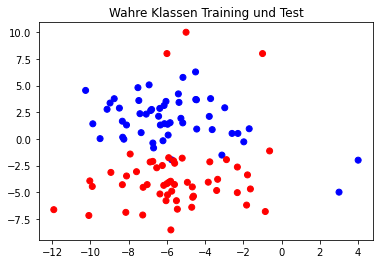

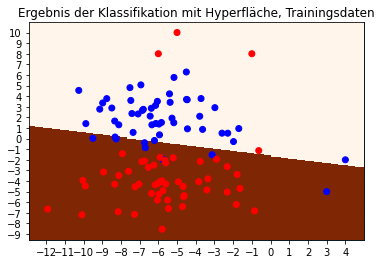

Accuracy Test 0.92
Steigung: -0.22
Schnittpunkt Y-Achse: -1.71


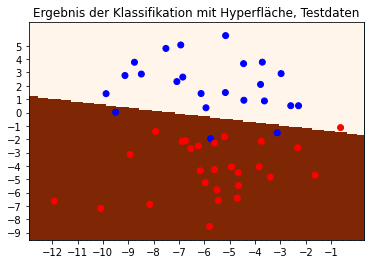

In [2]:
X,y=make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0,\
                                center_box=(- 8, 8), shuffle=True, random_state=43, return_centers=False)

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.5, random_state=43)

#hier die Ausreißer
Xall=np.append(X,[[-6,8],[-5,10],[4,-2],[3,-5],[-1,8]],axis=0)
yall=np.append(y,[1,1,0,0,1])

colormap=np.array(["b","r"])
plt.title("Wahre Klassen Training und Test")
X_train=np.append(X,[[-6,8],[-5,10],[4,-2],[3,-5],[-1,8]],axis=0)
y_train=np.append(y,[1,1,0,0,1])
plt.scatter(Xall[:,0],Xall[:,1],color=colormap[yall])
plt.show()

cat=linear_model.Perceptron(tol=1e-3, random_state=0)
cat.fit(X_train,y_train)
plt.title("Ergebnis der Klassifikation mit Hyperfläche, Trainingsdaten")
visualize_classifier(cat,X_train,y_train)
plt.scatter(X_train[:,0],X_train[:,1],color=colormap[y_train])
y_prd=cat.predict(X_train)
acc_t=0
for i in range(len(X_train)):    
    if y_prd[i]==y_train[i]:
        acc_t+=1
plt.show()

plt.title("Ergebnis der Klassifikation mit Hyperfläche, Testdaten")
y_prd=cat.predict(X_test)
visualize_classifier(cat,X_test,y_test)
plt.scatter(X_test[:,0],X_test[:,1],color=colormap[y_test])
acc=0
for i in range(len(X_test)):
    if y_prd[i]==y_test[i]:
        acc+=1
        
#print(f"Accuracy Training {acc_t/len(X_train)}")        
print(f"Accuracy Test {acc/len(X_test)}")
# #plt.plot((0,0),(-3.5,12))
x1,x2,y1,y2=-13,4,1.2,-2.6
#plt.plot((x1,x2),(y1,y2))
m=(y2-y1)/(x2-x1)
print(f"Steigung: {m:4.2f}")
b=y2-m*x2
print(f"Schnittpunkt Y-Achse: {b:4.2f}")

Durch diese wenigen Ausreisser hat sich die Steigung der Hyperfläche auf -.22 und der Schnittpunkt mit der y-Achse auf -1.71 massiv verändert. Dabei ist aber die Accuray mit 92% für die Testdaten nur unwesentlich schlechter. Die Lage der Hyperfläche ist bei diesem Verfahren also sehr empfindlich auf Ausreisser. Dies ist bei dem Support Vektor Algorithmus völlig anders, diese Methode ist sehr stabil bezüglich einzelner Ausreisser.

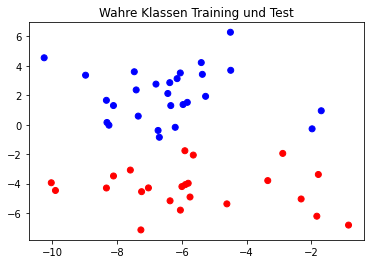

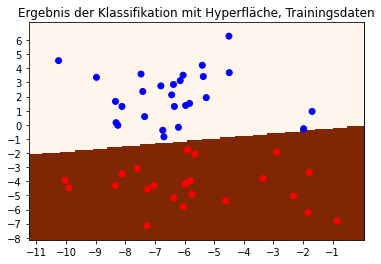

Accuracy Training 1.0
Accuracy Test 0.94
Steigung: 0.18
Schnittpunkt Y-Achse: -0.12


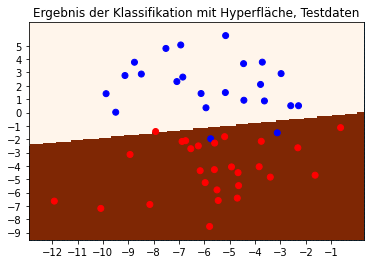

In [3]:

from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
def visualize_classifier(classifier,X,y,lab_x="",lab_y=""):
    
    
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    mesh_step_size = .1
 
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    plt.scatter(x_vals,y_vals,s=1)
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    output = output.reshape(x_vals.shape)
    plt.pcolormesh(x_vals, y_vals, output, cmap="Oranges",shading='auto') 

    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max()) 
 
   
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0))) 
    plt.xlabel(lab_x,fontsize=14)
    plt.ylabel(lab_y,fontsize=14)
    return

X,y=make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0,\
                                center_box=(- 8, 8), shuffle=True, random_state=43, return_centers=False)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.5, random_state=43)

colormap=np.array(["b","r"])
plt.title("Wahre Klassen Training und Test")
plt.scatter(X_train[:,0],X_train[:,1],color=colormap[y_train])
plt.show()


cat=LinearSVC(random_state=0, tol=1e-6,max_iter=10000,C=.005)
cat.fit(X_train,y_train)
plt.title("Ergebnis der Klassifikation mit Hyperfläche, Trainingsdaten")
visualize_classifier(cat,X_train,y_train)
plt.scatter(X_train[:,0],X_train[:,1],color=colormap[y_train])
y_prd=cat.predict(X_train)
acc_t=0
for i in range(len(X_train)):    
    if y_prd[i]==y_train[i]:
        acc_t+=1
plt.show()

plt.title("Ergebnis der Klassifikation mit Hyperfläche, Testdaten")
y_prd=cat.predict(X_test)
visualize_classifier(cat,X_test,y_test)
plt.scatter(X_test[:,0],X_test[:,1],color=colormap[y_test])

acc=0
for i in range(len(X_test)):
    if y_prd[i]==y_test[i]:
        acc+=1
print(f"Accuracy Training {acc_t/len(X_train)}")        
print(f"Accuracy Test {acc/len(X_test)}")
# #plt.plot((0,0),(-3.5,12))
x1,x2,y1,y2=-12,-1,-2.3,-.3
#plt.plot((x1,x2),(y1,y2))
m=(y2-y1)/(x2-x1)
print(f"Steigung: {m:4.2f}")
b=y2-m*x2
print(f"Schnittpunkt Y-Achse: {b:4.2f}")
plt.show()



Auch hier erhalten wir bei Verwendung dieses Algorithmus in sklearn (sklearn.svm.LinearSVC) eine Accuracy von 100% für die Testdaten und 96% für die Trainigsdaten. Die Lage der Entscheidungsgrenze ist wie zu erwarten fast identisch zu der des Perzeptrons. Mit den Ausreißern verändert sich nun aber die Lage der Hyperfläche kaum, wie unten gezeigt. 

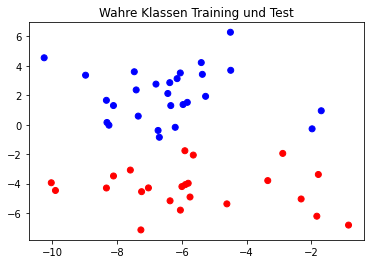

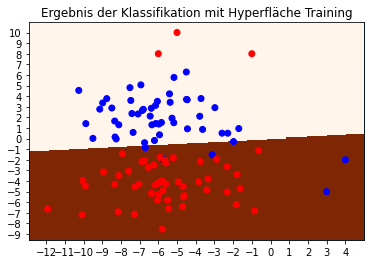

Accuracy Training 0.9142857142857143
Accuracy Test 0.96
Steigung: 0.09
Schnittpunkt Y-Achse: -0.11


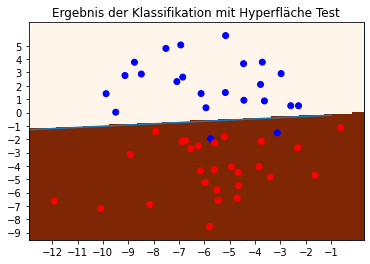

In [4]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
import sys
def visualize_classifier(classifier,X,y,lab_x="",lab_y=""):
    
    
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0   
    mesh_step_size = .1 
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    plt.scatter(x_vals,y_vals,s=1)
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    output = output.reshape(x_vals.shape)
    plt.pcolormesh(x_vals, y_vals, output, cmap="Oranges",shading='auto') 
    
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max())  
    
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0))) 
    plt.xlabel(lab_x,fontsize=14)
    plt.ylabel(lab_y,fontsize=14)    
    return


X,y=make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0,\
                                center_box=(- 8, 8), shuffle=True, random_state=43, return_centers=False)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.5, random_state=43)

#die Ausreißer
Xall=np.append(X,[[-6,8],[-5,10],[4,-2],[3,-5],[-1,8]],axis=0)
yall=np.append(y,[1,1,0,0,1])
Xall,yall=X_train,y_train

colormap=np.array(["b","r"])
plt.title("Wahre Klassen Training und Test")
X_train=np.append(X,[[-6,8],[-5,10],[4,-2],[3,-5],[-1,8]],axis=0)
y_train=np.append(y,[1,1,0,0,1])

plt.scatter(Xall[:,0],Xall[:,1],color=colormap[yall])
plt.show()



cat=LinearSVC(random_state=0, tol=1e-6,max_iter=10000,C=.0005)
cat.fit(X_train,y_train)
plt.title("Ergebnis der Klassifikation mit Hyperfläche Training")
visualize_classifier(cat,X_train,y_train)
plt.scatter(X_train[:,0],X_train[:,1],color=colormap[y_train])
y_prd=cat.predict(X_train)
acc_t=0
for i in range(len(X_train)):    
    if y_prd[i]==y_train[i]:
        acc_t+=1
plt.show() 

plt.title("Ergebnis der Klassifikation mit Hyperfläche Test")
y_prd=cat.predict(X_test)
visualize_classifier(cat,X_test,y_test)
plt.scatter(X_test[:,0],X_test[:,1],color=colormap[y_test])

acc=0
for i in range(len(X_test)):
    if y_prd[i]==y_test[i]:
        acc+=1
print(f"Accuracy Training {acc_t/len(X_train)}")        
print(f"Accuracy Test {acc/len(X_test)}")
# #plt.plot((0,0),(-3.5,12))
x1,x2,y1,y2=-13,-1,-1.3,-.2
plt.plot((x1,x2),(y1,y2))
m=(y2-y1)/(x2-x1)
print(f"Steigung: {m:4.2f}")
b=y2-m*x2
print(f"Schnittpunkt Y-Achse: {b:4.2f}")

plt.show()


Die Werte der Hyperfläche haben sich von <br>Steigung: 0.18, Schnittpunkt Y-Achse: -0.12 ohne Ausreißer nur auf <br>Steigung: 0.09,
Schnittpunkt Y-Achse: -0.11 mit Ausreißern geändert. <br>Die Entscheidungsgrenze ist also viel stabiler. Auch die Test-Accuracy ist bei dem SMV-Algorhithmus mit den Ausreissern mit 96% besser als die 92% des Perceptrons. Wir werden jetzt den SVM-Algorithmus von Grund auf erklären.

Um die Diskussion zu vereinfachen, nehmen wir ein simples Beispiel mit 2 Klassen von Werten (20 insgesamt), die auf einer Geraden liegen. Diese stellen die Trainingsdaten eines hypothetischen Klassifiers dar. Das System ist also eindimensional.

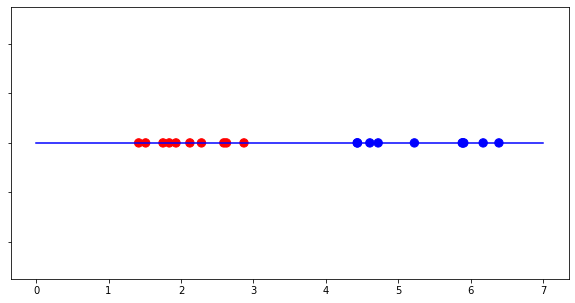

In [24]:
import matplotlib.pyplot as plt
import random
import numpy as np
random.seed(42)
x,c=[],[]
y=np.zeros(20)
from matplotlib.pyplot import figure
plt.figure(figsize=(10,5))
ax=plt.gca()
for i in range(10):
    x.append(random.normalvariate(2, .5))
    c.append("red")
for i in range(10):
    x.append(random.normalvariate(5, .6))
    c.append("blue")
plt.setp( ax.get_yticklabels(), visible=False)
plt.scatter(x,y,color=c,s=70)
plt.plot((0,7),(0,0),"b")

Wir könnten nun wie unten gezeigt eine Schwelle annehmen, die die Klassen trennt. Wenn wir einen neuen zun klassifizierenden Punkt bekommen, brauchten wir nur zu sehen, auf welcher Seite der Schwelle er liegt, um ihn zu klassifizieren.

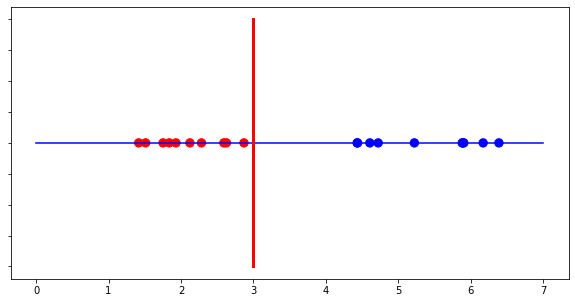

In [25]:
from matplotlib.pyplot import figure
plt.figure(figsize=(10,5))
ax=plt.gca()
plt.setp( ax.get_yticklabels(), visible=False)
plt.scatter(x,y,color=c,s=70)
plt.plot((0,7),(0,0),"b")
plt.plot((3,3),(-.1,.1),"r",linewidth=3)


Dies ist ein willkürlich schlechtes Beispiel dazu. Ein neuer Punkt in unseren Testdaten würde dann wie gezeigt der blauen Klasse zugeordnet.

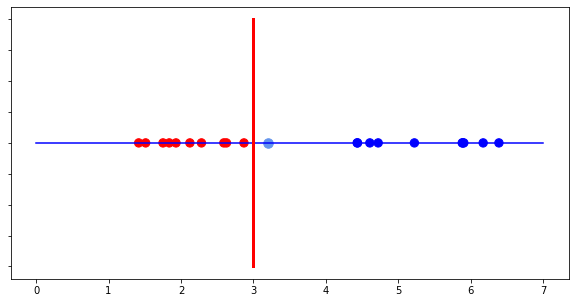

In [26]:
from matplotlib.pyplot import figure
plt.figure(figsize=(10,5))
ax=plt.gca()
plt.setp( ax.get_yticklabels(), visible=False)
plt.scatter(x,y,color=c,s=70)
plt.plot((0,7),(0,0),"b")
plt.plot((3,3),(-.1,.1),"r",linewidth=3)
plt.scatter(3.2,0,color="cornflowerblue",s=90)

Die Schwelle ist hier so gewählt, daß dieser Punkt, der eigentlich viel näher an den roten als an den blauen Punkten liegt, der blauen Klasse zugeordnet wird. Das ist sicher keine gute Klassifizierung, wie können wir eine bessere Schwelle finden? Wir nehmen jetzt als Schwelle die Mitte zwischen den jeweils äußersten Punkten der Klassen, die wir hier mit einem Kreuz markiert haben.

Text(3.690101337756699, -0.04, 'MARGIN')

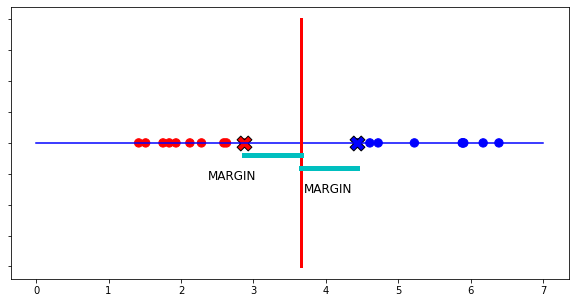

In [27]:
reds=[x[i] for i in range(len (x)) if c[i]=="red" ]
blues=[x[i] for i in range(len (x)) if c[i]=="blue" ]
redmax=max(reds)
bluemin=min(blues)
t=(bluemin+redmax)/2
from matplotlib.pyplot import figure
plt.figure(figsize=(10,5))
ax=plt.gca()
plt.setp( ax.get_yticklabels(), visible=False)
plt.scatter(x,y,color=c,s=70)
plt.plot((0,7),(0,0),"b")
plt.plot((t,t),(-.1,.1),"r",linewidth=3)
plt.scatter(redmax,0,color="red",s=220,edgecolors="black",marker="X")
plt.scatter(bluemin,0,color="blue",s=220,edgecolors="black",marker="X")
plt.plot((redmax,t),(-.01,-.01), "c",linewidth=5)
plt.text(redmax-.5,-.03,"MARGIN",fontsize=12)
plt.plot((t,bluemin),(-.02,-.02), "c",linewidth=5)
plt.text(t+.04,-.04,"MARGIN",fontsize=12)

 Den Abstand zwischen jeweils einem der beiden markierten Punkten und der Schwelle nennt man "Margin". Unsere Schwelle liegt in der Mitte zwischen den Punkten, die Margins sind gleich groß und beide ausserdem maximal groß. Würden wir die Schwelle verschieben, würde ein Margin kleiner werden als bei der mittigen Schwelle.

Wenn wir jetzt einen neuen Punkt aus unseren Testdaten wie vorher zuordnen (s.u.), ist das Ergebnis viel intuitiver, der Punkt wird der roten Klasse zugeordnet. Der Abstand zum nächsten roten Punkt ist ja auch viel kleiner als zum nächsten blauen Punkt.

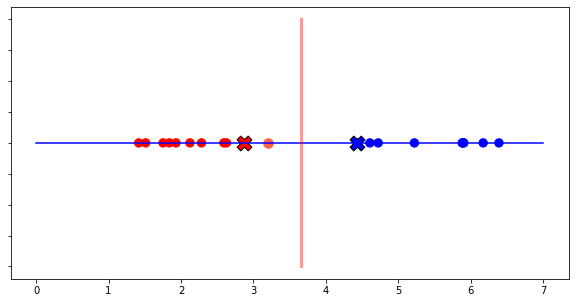

In [28]:
from matplotlib.pyplot import figure
plt.figure(figsize=(10,5))
ax=plt.gca()
plt.setp( ax.get_yticklabels(), visible=False)
plt.scatter(x,y,color=c,s=70)
plt.plot((0,7),(0,0),"b")
plt.plot((t,t),(-.1,.1),"r",linewidth=3,alpha=.4)
plt.scatter(redmax,0,color="red",s=220,edgecolors="black",marker="X")
plt.scatter(bluemin,0,color="blue",s=220,edgecolors="black",marker="X")
plt.scatter(3.2,0,color="tomato",s=90)


Legt man die Schwelle in die Mitte der beiden markierten Punkte, bauen wir einen sogenannten Maximal Margin Klassifizierer auf.

Dies sieht zunächst sehr einsichtig aus, was aber wenn wir einen Ausreißer in den Trainingsdaten hätten.(Hier der rote Punkt, der mit einem Kreuz markiert ist). Unsere Schwelle und der Margin würde sich extrem verändern. Ein neuer Punkt in unseren Testdaten (leicht rot gefärbt) würde rot zugeordnet, obwohl er deutlich weiter von den anderen roten Punkten (wenn man den Ausreißer nicht berücksichtigt!) entfernt wäre als von den blauen.

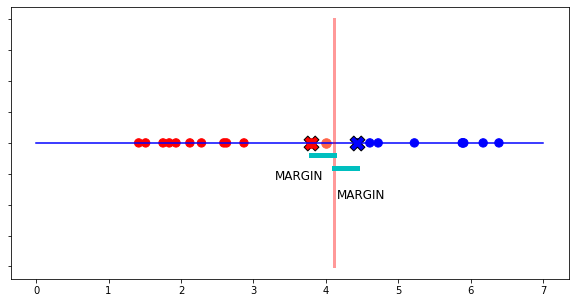

In [29]:
from matplotlib.pyplot import figure
plt.figure(figsize=(10,5))
ax=plt.gca()
plt.setp( ax.get_yticklabels(), visible=False)
plt.scatter(x,y,color=c,s=70)
redmax=3.8
t=(bluemin+redmax)/2
plt.plot((0,7),(0,0),"b")
plt.plot((t,t),(-.1,.1),"r",linewidth=3,alpha=.4)
plt.scatter(redmax,0,color="red",s=220,edgecolors="black",marker="X")
plt.scatter(bluemin,0,color="blue",s=220,edgecolors="black",marker="X")
plt.scatter(3.8,0,color="red",s=90)
plt.plot((redmax,t),(-.01,-.01), "c",linewidth=5)
plt.text(redmax-.5,-.03,"MARGIN",fontsize=12)
plt.plot((t,bluemin),(-.02,-.02), "c",linewidth=5)
plt.text(t+.04,-.045,"MARGIN",fontsize=12)
plt.scatter(4.0,0,color="tomato",s=90)

Maximal Margin Klassifizierer sind somit sehr empfindlich für Ausreißer in den Trainingsdaten, was sie nahezu unbrauchbar macht. Wie können wir das ändern? Wir müssen falsche Klassifizierungen erlauben. Wenn wir den Ausreißer in den Trainingsdaten nicht berücksichtigen für unsere Schwelle, und ihn somit falsch klassifizieren, wird der neue Testdatenpunkt (hellblau) mit unseren vorherigen Margins besser zugeordnet.

3.650101337756699


Text(4.0, 0.02, 'Missklassifiziert')

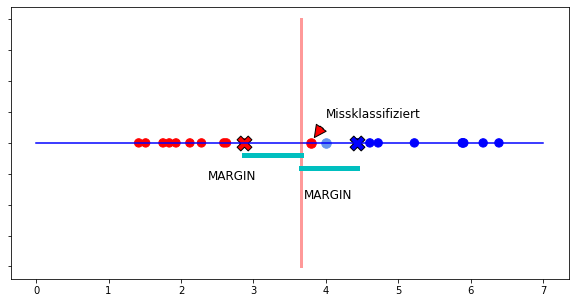

In [30]:
from matplotlib.pyplot import figure
plt.figure(figsize=(10,5))
ax=plt.gca()
plt.setp( ax.get_yticklabels(), visible=False)
plt.scatter(x,y,color=c,s=70)
redmax=max(reds)
t=(bluemin+redmax)/2
print(t)
plt.plot((0,7),(0,0),"b")
plt.plot((t,t),(-.1,.1),"r",linewidth=3,alpha=.4)
plt.scatter(redmax,0,color="red",s=220,edgecolors="black",marker="X")
plt.scatter(bluemin,0,color="blue",s=220,edgecolors="black",marker="X")
plt.scatter(3.8,0,color="red",s=90)
plt.plot((redmax,t),(-.01,-.01), "c",linewidth=5)
plt.text(redmax-.5,-.03,"MARGIN",fontsize=12)
plt.plot((t,bluemin),(-.02,-.02), "c",linewidth=5)
plt.text(t+.04,-.045,"MARGIN",fontsize=12)
plt.scatter(4.0,0,color="cornflowerblue",s=90)
plt.annotate("Missklassifiziert",xy=(3.8,.001),xytext=(4.,0.02),fontsize=12,arrowprops=dict(facecolor="red",shrink=0.2))

Wir erreichen damit geringere Varianz aber höheren Bias, das heißt, unsere Schwelle bildet nicht den gesamten Datensatz korrekt ab, aber sie ordnet die Testdaten besser zu.Wenn wir solche Missklassifizierungen erlauben, spricht man von einm "Soft Margin". Wie finden wir aber den besten Soft Margin, wir könnten ja auch andere Punkte für unseren Margin nehmen und mehr oder weniger Missklassifizierungen zulassen. Wir erreichen dies , indem wir die Anzahl von Missklassifizierungen mit einer negativen Bewertung belegen, und die Größe des Margins positiv bewerten. Der Algorithmus findet dann den besten Kompromiß. Wir haben bei den SVM Algorithmen hierfür einen Parameter (normalerweise C), der uns die Softheit des Margins wählen lässt und entsprechend optimiert werden muß. Diese oben gezeigte Methode beschreibt einen Support Vektor Klassifizierer. Unsere Punkte, die für den Margin den Ausschlag geben, werden nämlich als Support Vektoren bezeichnet.<b> Die Optimierung, die der SV-Algorithmus durchführt, ist, die Margins möglich groß zu machen, um die Klassen optimal zu trennen.<b>

Wie verhält sich unser Modell bei Vergrösserung einer der Klassen, so daß sie sehr unterschiedlich von der Grösse sind? Es ergibt mit SV in der Klassifizierung keinen Unterschied, eine große Differenz zu unseren bisherigen Klassifizierern, die die Schwelle aufgrund der hohen Punktanzahl links auf die roten Punkte hin verlagert hätten. Der SVM- Algorithmus eignet sich für ungleiche Klassengrössen deutlich besser. Auch ist er besser zur Behandlung von Ausreissern. Darüber hinaus können überlappende Klassen klassifiziert werden, wie wir weiter unten zeigen.

Text(0.9311899418456342, 0.02, '100 Punkte mehr')

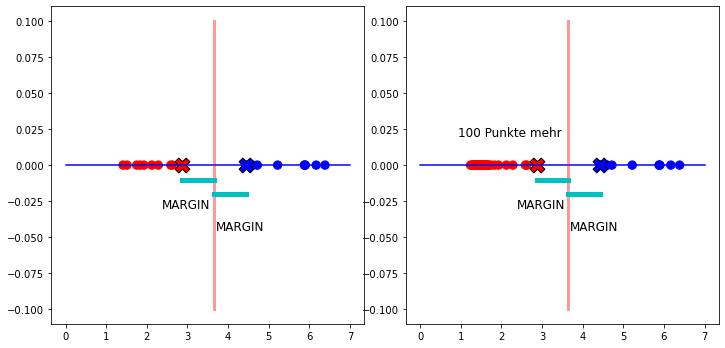

In [31]:

fig, ax = plt.subplots(1, 2, figsize=(10,5)) ##figsize bestimmt eine identische Größe für alle Einzelplots
fig.tight_layout() ### genug Abstand um alle Achsen mit Beschriftung abzubilden ###
def make_plot():
    plt.scatter(x,y,color=c,s=70)
    reds=[x[i] for i in range(len (x)) if c[i]=="red" ]
    blues=[x[i] for i in range(len (x)) if c[i]=="blue" ]
    redmax=max(reds)
    bluemin=min(blues)
    t=(bluemin+redmax)/2
    plt.plot((0,7),(0,0),"b")
    plt.plot((t,t),(-.1,.1),"r",linewidth=3,alpha=.4)
    plt.scatter(redmax,0,color="red",s=220,edgecolors="black",marker="X")
    plt.scatter(bluemin,0,color="blue",s=220,edgecolors="black",marker="X")
    plt.plot((redmax,t),(-.01,-.01), "c",linewidth=5)
    plt.text(redmax-.5,-.03,"MARGIN",fontsize=12)
    plt.plot((t,bluemin),(-.02,-.02), "c",linewidth=5)
    plt.text(t+.04,-.045,"MARGIN",fontsize=12)

plt.subplot(1,2,1)
make_plot()

for i in range(100):
    x.append(random.normalvariate(1.5, .1))
    c.append("red")
y=np.zeros(120)

plt.subplot(1,2,2) #1 Reihen, 2 Spalten, Abbildung 2
make_plot()
plt.text(bluemin-3.5,.02,"100 Punkte mehr",fontsize=12)
# x,c=[],[]
# random.seed(43)
# for i in range(10):
#     x.append(random.normalvariate(2, .5))
#     c.append("red")
# for i in range(10):
#     x.append(random.normalvariate(5, .6))
#     c.append("blue")
# # for i in range(30):
# #     x.append(random.normalvariate(1.5, .1))
# #     c.append("red")
# y=np.zeros(20)



Nehmen wir nun an, wir hätten zweidimensionale Daten. Diese würden wir in ein xy Koordinatensystem eintragen. Wir könnten dann mit derselben Methode eine Trenngerade statt einer Schwelle produzieren. Eine solche Gerade nennt man ebenfalls Hyperplane (wobei meistens "Hyperplane" erst verwendet wird, wenn man die Grenze in höher dimensionalen Räumen nicht mehr zeichnen kann). Bei 3 Dimensionen hätten wir eine Grenzfläche und in höheren Dimensionen dann Grenzräume, die wir uns nicht mehr vorstellen können.

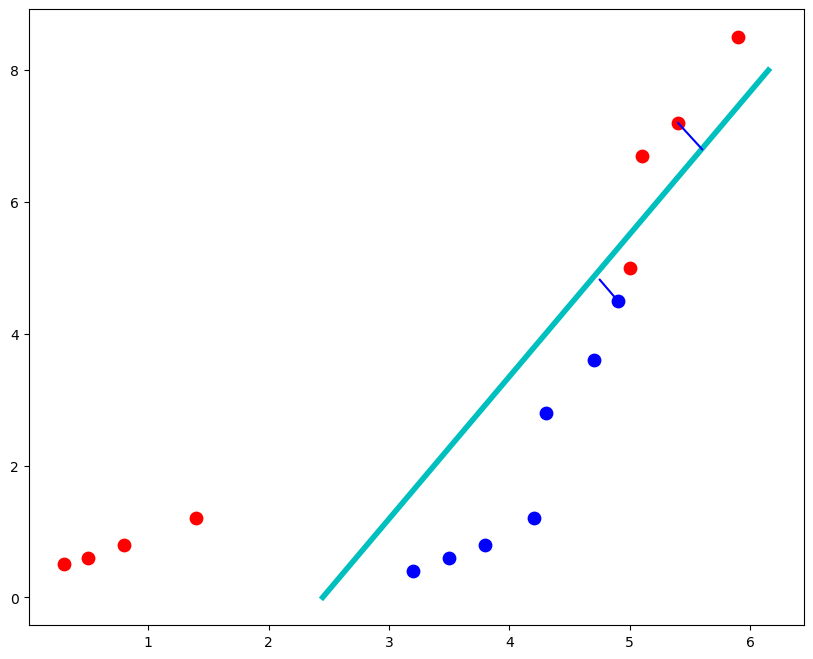

In [3]:
import matplotlib.patches as patches
fig = plt.subplots( figsize=(10,8))

xr=[0.3,.5,.8,1.4,5.1,5.4,5.9,5.0]
yr=[0.5,.6,.8,1.2,6.7,7.2,8.5,5.0]
xb=[3.2,3.5,3.8,4.2,4.3,4.7,4.9]
yb=[0.4,.6,.8,1.2,2.8,3.6,4.5]
plt.scatter(xr,yr,color="red",s=80)
plt.scatter(xb,yb,color="blue",s=80)
plt.plot((2.45,6.15),(0,8),"c",linewidth=4)
plt.plot((5.4,5.6),(7.2,6.8),"b")
plt.plot((4.75,4.9),(4.82,4.5),"b")



Mit den Margins sieht das Bild so aus mit einer Missklassifizierung.<br><img width=800 height=800 class="imgright" src="Images/Softmargin.png">


Eine SVM sucht aus allen denkbaren Hyperplanes die heraus, die den breitesten Margin ergibt.(Hier die rote.) Diese separiert die Klassen optimal.<br><img width=800 height=800 class="imgright" src="Images/Hyperplane.png">


Bisher haben wir einfache linear separierbare Datensätze gehabt. Was ist aber mit diesem Beispiel? Es geht um die Applikation von Dünger auf eine Feldfrucht und das davon abhängige Wachstum.

Text(0.5, 1.0, 'Klasse rot -> kein Wachstum \n Klasse grün -> Wachstum')

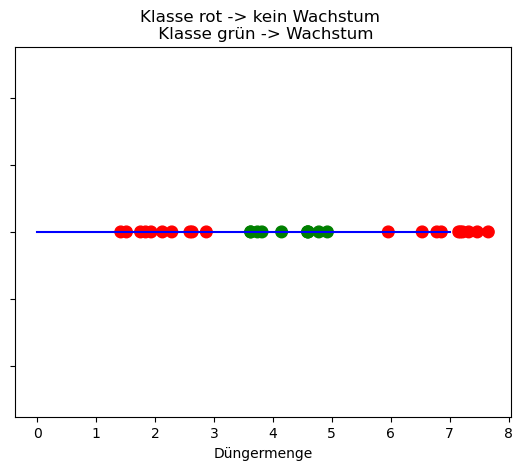

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
random.seed(42)
x,c=[],[]
y=np.zeros(30)
ax=plt.gca()
for i in range(10):
    x.append(random.normalvariate(2, .5))
    c.append("red")
for i in range(10):
    x.append(random.normalvariate(4, .4))
    c.append("green")
for i in range(10):
    x.append(random.normalvariate(7, .5))
    c.append("red")
plt.setp( ax.get_yticklabels(), visible=False)
plt.scatter(x,y,color=c,s=70)
plt.plot((0,7),(0,0),"b")
plt.xlabel("Düngermenge")
plt.title("Klasse rot -> kein Wachstum \n \
Klasse grün -> Wachstum")

Hier können wir nicht wie vorher mit einer Schwelle die Klassen optimal trennen. Der SV Algorithmus Maschinen kann dies trotzdem mit Hilfe des sogenannten "Kernel-Tricks". Ein Kernel ist die Projektion von einer geometrischen Situation in eine höhere Dimension. Für unser Beispiel fügen wir eine y-Achse hinzu und tragen die Punkte für y mit dem Wert x³ für alle unsere x-Werte auf. Ausserdem tragen wir einen Testdatenpunkt mit der Düngermenge 5 ein und beobachten, auf welche Seite der Geraden der Wert fällt.<br> Wegen der Möglichkeit der Verwendung von unterschiedlichen Kernels wird auch der Name Support Vektor <b>Machine</b> für diese Methode gewählt.

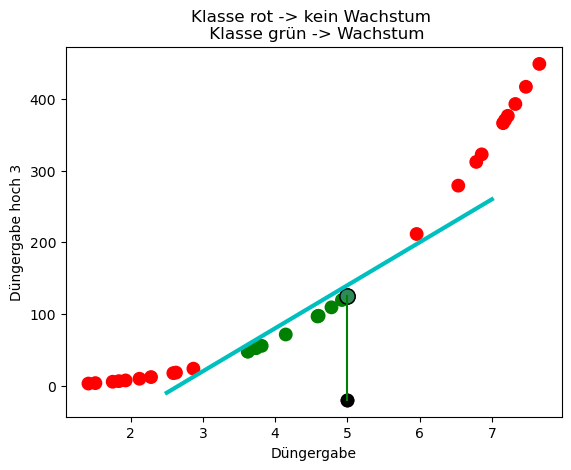

In [2]:
x,c=[],[]
ax=plt.gca()
random.seed(42)
for i in range(10):
    x.append(random.normalvariate(2, .5))
    c.append("red")
for i in range(10):
    x.append(random.normalvariate(4, .4))
    c.append("green")
for i in range(10):
    x.append(random.normalvariate(7, .5))
    c.append("red")
ywert=[elem**3 for elem in x] 
plt.scatter(x,ywert,color=c,s=80)
plt.ylabel("Düngergabe hoch 3")
plt.xlabel("Düngergabe")
plt.title("Klasse rot -> kein Wachstum \n \
Klasse grün -> Wachstum")
plt.plot((2.5,7),(-10,260),"c",linewidth=3)
plt.scatter((5,5),(-20,-20), s=80 , color="black")
plt.plot((5,5),(-20,125), "g")
plt.scatter((5,5),(125,125), s=120 , color="seagreen",edgecolors="black")

Durch diesen Trick können wir jetzt den Datensatz linear separieren. Der neue Punkt wird nach der Transformation richtig klassifiziert. SVM suchen systematisch nach solchen Kernel, um in höheren Dimensionen Hyperplanes zu finden. Neben der Möglichkeit, Polynome zu benutzen, wie im Beispiel, werden auch oft radiale Kernel (rbf) verwandt. Alle diese Möglichkeiten bietet auch unser SVM Modul in sklearn. Wir wollen jetzt zum Schluss dieses Kapitels die radiale Basis Funktion (rbf) unseres Moduls sklearn.svm.SVC zum Klassifizieren von zwei konzentrischen Kreisen benutzen. 


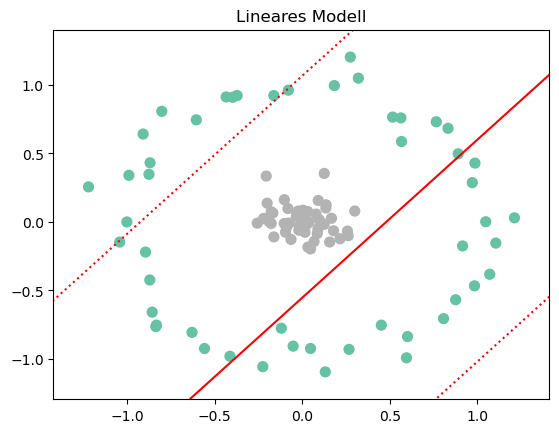

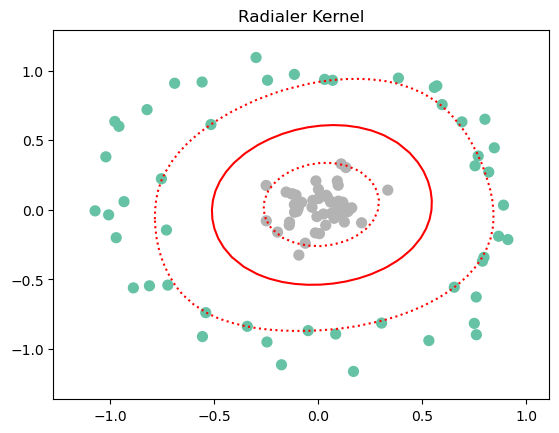

In [3]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import sys
import matplotlib.pyplot as plt
def Hyperplane(kategorizierer,X,y):
    ax = plt.gca()
    x0min,x0max=np.min(X[:,0]),np.max(X[:,0])
    x1min,x1max=np.min(X[:,1]),np.max(X[:,1])
   
    x = np.linspace(x0min-.2,x0max+.2,40)
    y = np.linspace(x1min-.2,x1max+.2,40)
    Y, X = np.meshgrid(y, x)
    xy = np.column_stack([X.ravel(), Y.ravel()])
    Grenze = kategorizierer.decision_function(xy).reshape(X.shape)
        
    ax.contour(X, Y, Grenze, colors='r',
               levels=[-1, 0, 1], 
               linestyles=[':', '-', ':'])
    

    plt.show()
X, y = make_circles(100, factor=.1, noise=.1)
plt.title("Lineares Modell")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set2')
clf = SVC(kernel='linear').fit(X, y)
Hyperplane(clf,X,y)
plt.title("Radialer Kernel")
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set2')
clf= SVC(kernel="rbf").fit(X,y)
Hyperplane(clf,X,y)

Wir erkennen, daß mit dem linearen Modell keine Klassifizierung möglich ist, die Hyperplane trennt die Kategorien nicht. Mit der radialen Basisfunktion gelingt dies aber im unteren Beispiel perfekt. Dies gelingt durch Projektion in die 3. Dimension, der z-Wert der zusätzlichen Dimension entspricht dabei dem Abstand eines Punktes vom Mittelpunkt der xy-Fläche. Die Entscheidungsfläche ist eingezeichnet.

[0.5 0.5 0.5 0.5]


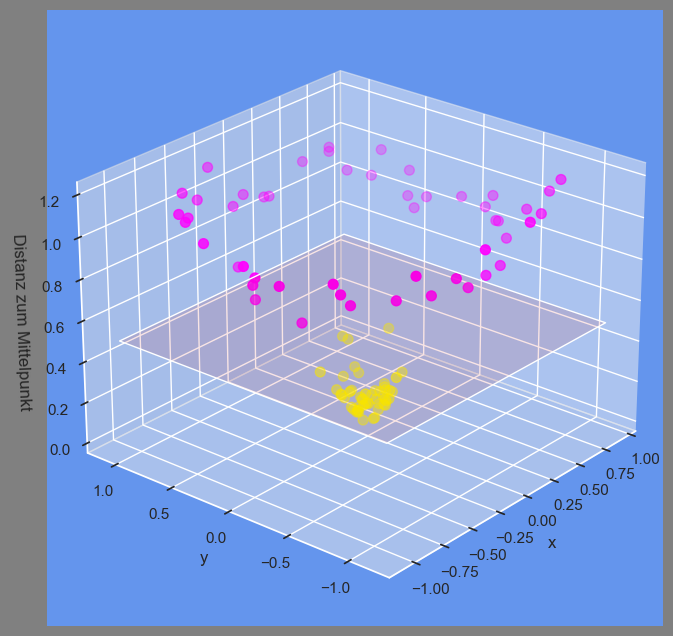

In [4]:
def plot_3D(X,y):
    import seaborn as sns
    from matplotlib import rcParams

    rcParams['figure.figsize'] = 15,8
    sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'grey'})
    
    r=(X[:,0]**2+X[:,1]**2)**.5
    ax = plt.subplot(projection='3d')
    xx=np.linspace(-1,1,50)
    yy=np.linspace(-1,1,50)
    z=np.array((.4,.4,.4,.4))
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    
    edges_x = [np.min(X[:,0]), np.max(X[:,0])]
    edges_y = [np.min(X[:,1]), np.max(X[:,1])]    
    xs, ys = np.meshgrid(edges_x, edges_y)
#zs = np.array([w[0] + x * w[1] + y * w[2] for x, y in  zip(np.ravel(xs), np.ravel(ys))])
#print(np.ravel(xs))

    zs=np.array((.5,.5,.5,.5))
    print(zs)
#zs=np.array(y)
    ax.plot_surface(xs, ys, zs.reshape((2, 2)),color= "red",alpha=0.1)

    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Distanz zum Mittelpunkt')
    ax.view_init(25, 220)
    
plot_3D(X,y)

Es lohnt sich zusammenfassend immer, ein SVM Modell zum Kategorizieren oder für die Regression zu versuchen. Insbesondere bei ungleich großen Klassen, Ausreißern oder auch überlappenden Klassen ist die SVM Methode oft überraschend effektiv. Durch den Kernel-Trick kann sie auch komplizierte Entscheidungsgrenzen gut erzeugen, wobei die sklearn SVM Methode selbst nach einem optimalen Kernel suchen kann.